# Exploratory Data Analysis

With our data now cleaned I can begin to explore the home run data to identify relationships and trends that can help explain what is contributing to a batters home run exit velocity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load the Data

Loading in each of our cleaned datasets:
- StatCast home run pitch data
- Baseball samples from 2015, 2016 and 2017
- Batter personal stats (Height, Weight, Age)

In [2]:
hr_df = pd.read_csv('../data/final_clean_hr.csv')
baseballs_df = pd.read_csv('../data/final_mlb_baseballs.csv')
batters_df = pd.read_csv('../data/final_clean_player_info.csv')

In [3]:
hr_df.drop('Unnamed: 0', axis=1, inplace=True)
baseballs_df.drop('Unnamed: 0', axis=1, inplace=True)
batters_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
hr_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y
0,CH,2017-06-10,84.5,-3.4020,6.4696,Aaron Judge,592450,501957,4.0,R,...,-14.0814,3.8260,1.6672,382.0,121.1,24.626,84.120,1682.0,6.342,54.1561
1,FF,2017-04-28,97.1,-2.8091,5.9279,Aaron Judge,592450,592332,5.0,R,...,-11.0144,3.9900,1.8400,435.0,119.4,16.541,96.019,2335.0,6.043,54.4549
2,CU,2015-06-23,86.7,-1.5647,5.3406,Giancarlo Stanton,519317,593372,7.0,R,...,-33.2860,3.7900,1.7200,479.0,119.2,21.970,84.343,2145.0,5.035,55.4629
3,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,8.0,L,...,-34.1660,3.6318,1.6020,467.0,118.7,22.736,88.690,2173.0,5.433,55.0652
4,SL,2017-06-11,84.7,-1.9795,5.6860,Aaron Judge,592450,548337,5.0,R,...,-24.6262,3.8264,1.6676,495.0,118.6,28.419,84.757,2183.0,6.153,54.3442


In [5]:
baseballs_df.head()

,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds,year
0,5.120125,9.107917,0.040502,0.491333,12740.875,2015
1,5.122500,9.079000,0.038432,0.494100,12926.400,2016
2,5.104863,9.080000,0.038000,0.476463,12926.000,2017


In [6]:
batters_df.head()

,batter_id,height,weight,age
0,592450,79,282,26
1,519317,78,245,28
2,471865,73,220,32
3,443558,74,230,38
4,121347,75,230,43


#### Merge the Dataframes

In order to work with this data together I'll merge the data into one dataframe.

In [7]:
final_df = pd.merge(hr_df, batters_df, how='left', left_on='batter', right_on='batter_id')

In [8]:
final_df[final_df['batter_id'].isnull()]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,batter_id,height,weight,age


In [9]:
final_df = pd.merge(final_df, baseballs_df, how='left', left_on='game_year', right_on='year')

In [10]:
final_df.isnull().sum().sum()

0

In [11]:
final_df.drop_duplicates(inplace=True)

In [12]:
final_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,batter_id,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds,year
0,CH,2017-06-10,84.5,-3.4020,6.4696,Aaron Judge,592450,501957,4.0,R,...,592450,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000,2017
1,FF,2017-04-28,97.1,-2.8091,5.9279,Aaron Judge,592450,592332,5.0,R,...,592450,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000,2017
2,CU,2015-06-23,86.7,-1.5647,5.3406,Giancarlo Stanton,519317,593372,7.0,R,...,519317,78,245,28,5.120125,9.107917,0.040502,0.491333,12740.875,2015
3,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,8.0,L,...,519317,78,245,28,5.104863,9.080000,0.038000,0.476463,12926.000,2017
4,SL,2017-06-11,84.7,-1.9795,5.6860,Aaron Judge,592450,548337,5.0,R,...,592450,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000,2017


#### Final Dataframe Updates

With all of my data now merged into one frame I want to make some final changes:
- Drop Columns:
    - `batter`  : This column is the batter id which I used to the merge the dataframes. I already have the batter names so I will work with that column moving forward
    - `pitcher` : This column is the pitcher id. I am focused on the batter specifically and I also have all of the specific statistics about each of the pitches thrown so this is not needed
    - `game_date` : I have the game year (or season) to analyze and will not need game date
    - `batter_id` : This column was used to merge the batters personal stats in with the home run data and was added through that process and is not needed
    - `year` : This columns was used to merge the baseball stats in with the home run data and was added through that process and is not needed

In [13]:
col = [
    'batter',
    'pitcher',
    'game_date',
    'batter_id',
    'year'
]
final_df.drop(col, axis=1, inplace=True)

#### Save the data

Saving a final version of this dataframe.

In [14]:
# final_df.to_csv('../data/final_for_preprocessing.csv')

### Explore the data

Final features (Data Dictionary):

**NOTE:** For more detail about each of the statistics you can visit the following websites:
    - https://baseballsavant.mlb.com/
    - https://fivethirtyeight.com/features/juiced-baseballs/
    - https://www.theringer.com/2017/6/14/16044264/2017-mlb-home-run-spike-juiced-ball-testing-reveal-155cd21108bc

- **Pitch Features**
    - `pitch_type`: The type of pitch that was thrown and hit for a home run
        - `CH : Changeup`
        - `CU : Curveball`
        - `EP : Eephus`
        - `FC : Cut Fastball (Cutter)`
        - `FF : Four-seam Fastball`
        - `FO : Pitch Out`
        - `FS : Sinking Fastball / Split-Fingered (Splitter)`
        - `FT : Two-seam Fastball`
        - `KC : Knuckle-curve`
        - `KN : Knuckleball`
        - `SC : Screwball`
        - `SI : Sinker`
        - `SL : Slider`
    - `p_throws`: the strong hand in which the pitcher threw the pitch
    - `pfx_x`: the horizontal movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement. This parameter is measured at y=40 feet regardless of the y0 value.
    - `pfx_z`: the vertical movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement. This parameter is measured at y=40 feet regardless of the y0 value.
    - `vx0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `vy0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `vz0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `ax`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `ay`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `az`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `effective_speed`: the (actual) speed of the pitch upon the ball crossing home plate
    - `release_speed`: the (perceived) speed of the pitch upon release from the pitcher
    - `release_spin_rate`: how much spin, in revolutions per minute, a pitch was thrown with upon release.
    - `release_extension`: how far off the mound, in feet, a pitcher releases the pitch.
    - `release_pos_y`: the release coordinates in three dimensions, measure at the initial release point.
    - `release_pos_x`: the release coordinates in three dimensions, measure at the initial release point.
    - `release_pos_z`: the release coordinates in three dimensions, measure at the initial release point.
- **MLB Features**
    - `game_year`: the season the home run hit occurred (2015, 2016 and 2017). 
    - `weight_(oz)`: the weight of the baseballs in oz from each season (2015, 2016 and 2017).
    - `circumference_(in)`: the circumference of the baseballs in inches from each season (2015, 2016 and 2017).
    - `avg_seam_height`: seam height was defined as the average radial distance from the seam to the ear, 3 mm left and right of the seam. 
    - `avg_ccor`: cylindrical coefficient of restitution (ccor) is the measurement of the "bounciness" of the baseball and is the core ingredient of "the pill" the middle rubber of the baseball.
    - `avg_ds`: a measure of a ball's hardness. Its measurement is conducted to represent bat-ball impact forces.
- **Batter Features**
    - `player_name`: the name of the player that hit the home run
    - `height`: the height in inches of the player that hit the home run
    - `weight`: the weight in lbs of the player that hit the home run
    - `age`: the age of the player that hit the home run
    - `hit_distance_sc`: the distance the ball traveled from home plate
    - `launch_speed`: **(Target Variable)** aka exit velocity, measures the speed (mph) of the baseball as it comes off the bat, immediately after a batter makes contact.
    - `launch_angle`: how high, in degrees, a ball was hit by a batter.
    - `bb_type`: the type of hit that came off the bat (fly ball or line drive) for a home run.
    - `sz_top`: the distance in feet from the ground to the top of the current batter’s rulebook strike zone as measured from the video by the PITCHf/x operator. The operator sets a line at the batter’s belt as he settles into the hitting position, and the PITCHf/x software adds four inches up for the top of the zone
    - `sz_bottom`: the distance in feet from the ground to the bottom of the current batter’s rulebook strike zone. The PITCHf/x operator sets a line at the hollow of the knee for the bottom of the zone.
    - `zone`: the location of the pitch as is crossed home plate according to the mapped areas of the batters zone box (1 - 14).
    - `plate_x`: strike zone coordinate x
    - `plate_z`: strike zone coordinate z

In [15]:
len(final_df.dtypes)

36

In [16]:
final_df.columns

Index(['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z',
       'player_name', 'zone', 'p_throws', 'bb_type', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'height', 'weight', 'age', 'weight_(oz)',
       'circumference_(in)', 'avg_seam_height', 'avg_ccor', 'avg_ds'],
      dtype='object')

### Visualizing the Data

#### Launch Speed and Launch Agle Distributions

Lets get a sense of the distributions for two of the main features within the data.
- Launch Speed
- Launch Angle

The distribution in this data identifies that when a home run is hit the speed of the batted ball is on average normally distributed between 90 and 120 mph at an angle of 15 to 50 degrees.

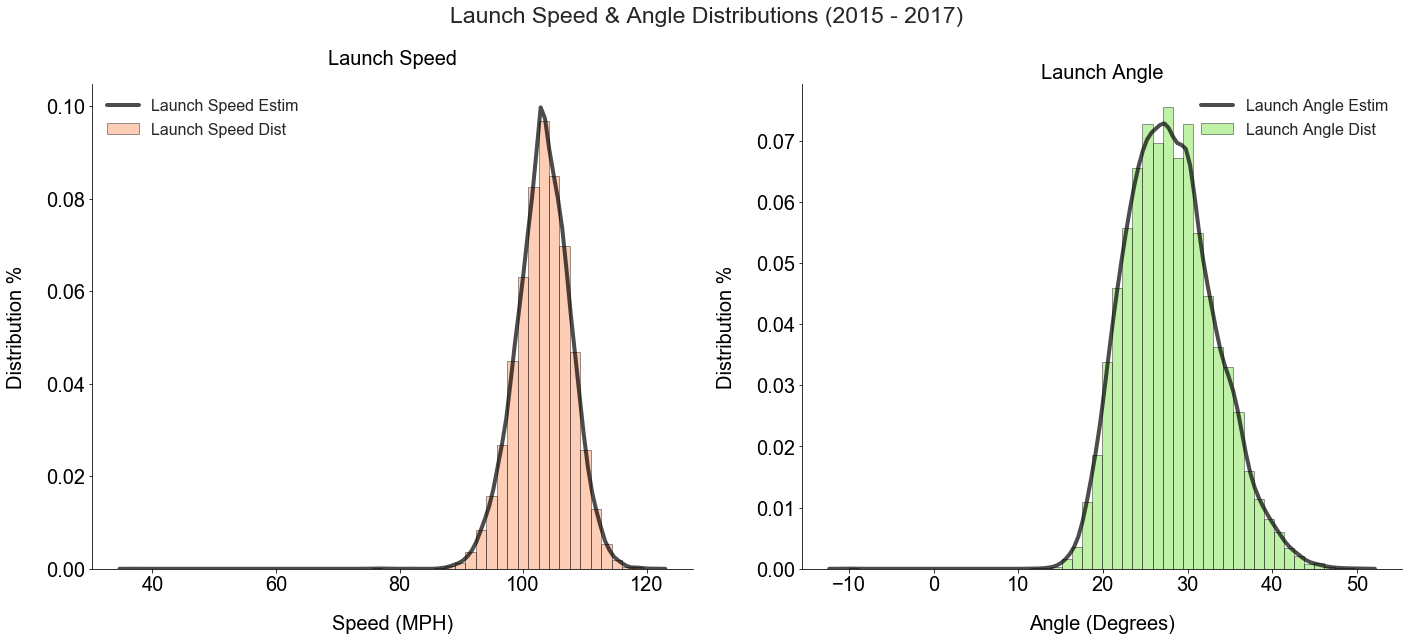

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,9))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

fig.suptitle('Launch Speed & Angle Distributions (2015 - 2017)', y=1)
a = sns.distplot(final_df['launch_speed'], 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim","alpha":.7},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 ax=axes[0], 
                 label='Launch Speed Dist')
b = sns.distplot(final_df['launch_angle'], 
                 color = '#61de2a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim","alpha":.7},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 ax=axes[1], 
                 label = 'Launch Angle Dist')

axes[0].set_xlabel('Speed (MPH)', fontsize=20, labelpad=20)
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('Launch Speed', fontsize=20, pad=20)
axes[1].set_xlabel('Angle (Degrees)', fontsize=20, labelpad=20)
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('Launch Angle', fontsize=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")

fig.tight_layout()
fig.subplots_adjust(top=0.88)

fig.savefig('../plots/subplots_angle_speed_all.png')

#### Hit Distance Distribution

The next feature I'd like to explore is the distribution on the distance the ball travels for all home runs hit between across all seasons (2015, 2016, 2017).

In [18]:
final_df.hit_distance_sc.min(), final_df.hit_distance_sc.max()

(0.0, 504.0)

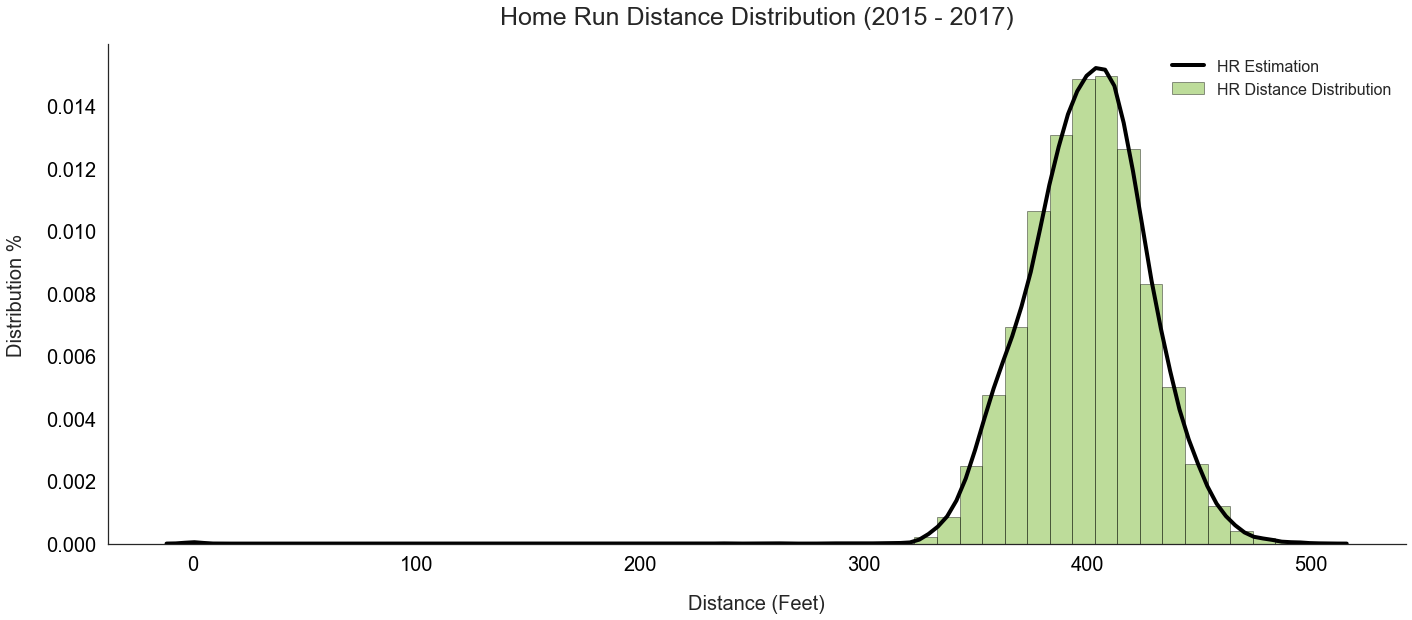

In [19]:
plt.figure(figsize=(20,9))
sns.set(style="white")
sns.set_context("poster")

plt.title('Home Run Distance Distribution (2015 - 2017)', fontsize=25, pad=20)

a = sns.distplot(final_df['hit_distance_sc'], 
                 color = '#5ca904', 
                 kde_kws={"color":"k","lw":4,"label":"HR Estimation","alpha":1},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 label='HR Distance Distribution')

plt.xlabel('Distance (Feet)', fontsize=20, labelpad=20)
plt.ylabel('Distribution %', fontsize=20, labelpad=20)

a.tick_params(labelsize=20,labelcolor="k")

sns.despine()

plt.tight_layout();
# plt.savefig('../plots/dist_all_seasons.png')

In [20]:
hr_distance17 = final_df[final_df['game_year'] == 2017][['hit_distance_sc']]
hr_distance16 = final_df[final_df['game_year'] == 2016][['hit_distance_sc']]
hr_distance15 = final_df[final_df['game_year'] == 2015][['hit_distance_sc']]

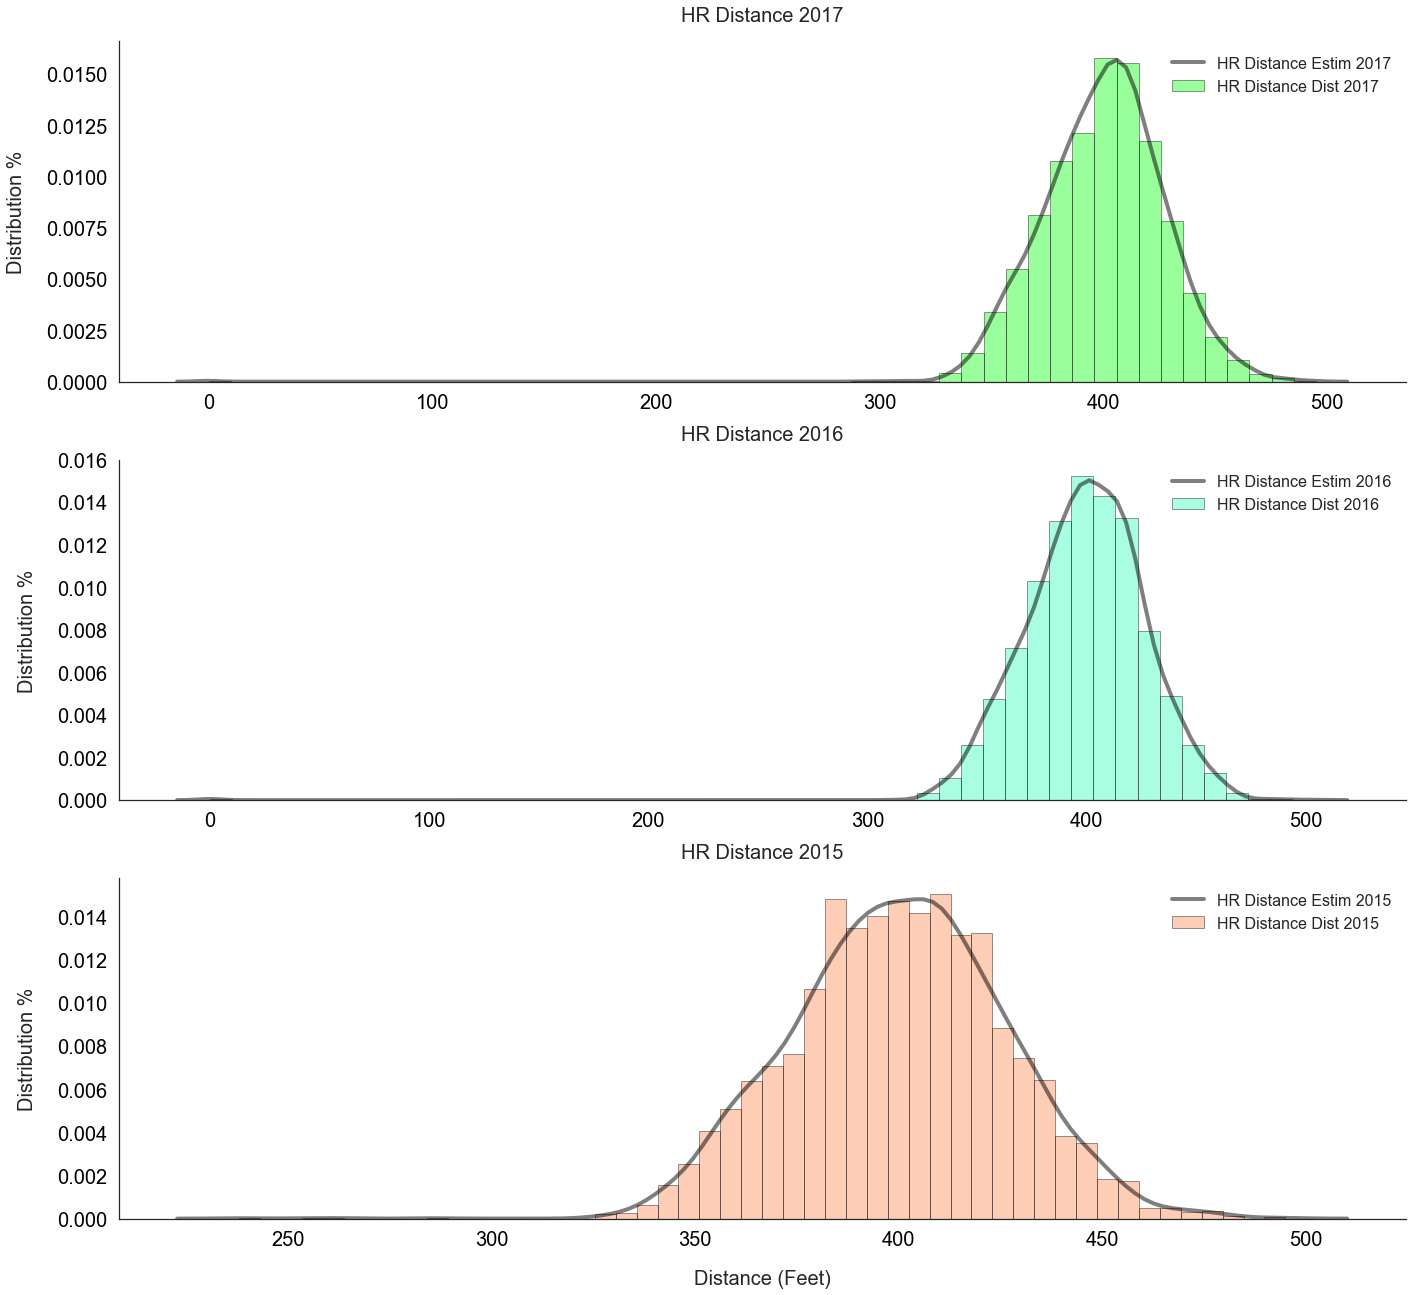

In [21]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(20,20))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.distplot(hr_distance17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"HR Distance Estim 2017","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[0],
                 label='HR Distance Dist 2017')
b = sns.distplot(hr_distance16, 
                 color = '#2afeb7', 
                 kde_kws={"color":"k","lw":4,"label":"HR Distance Estim 2016","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[1],
                 label = 'HR Distance Dist 2016')
c = sns.distplot(hr_distance15, 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"HR Distance Estim 2015","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[2],
                 label = 'HR Distance Dist 2015')

axes[0].set_xlabel('', fontsize=20, labelpad=20)
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('HR Distance 2017', fontsize=20, pad=20)
axes[1].set_xlabel('', fontsize=20, labelpad=20)
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('HR Distance 2016', fontsize=20, pad=20)
axes[2].set_xlabel('Distance (Feet)', fontsize=20, labelpad=20)
axes[2].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[2].set_title('HR Distance 2015', fontsize=20, pad=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")
c.tick_params(labelsize=20,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

#### Review by Year



In [22]:
launch_speed17 = final_df[final_df['game_year'] == 2017][['launch_speed']]
launch_speed16 = final_df[final_df['game_year'] == 2016][['launch_speed']]
launch_speed15 = final_df[final_df['game_year'] == 2015][['launch_speed']]

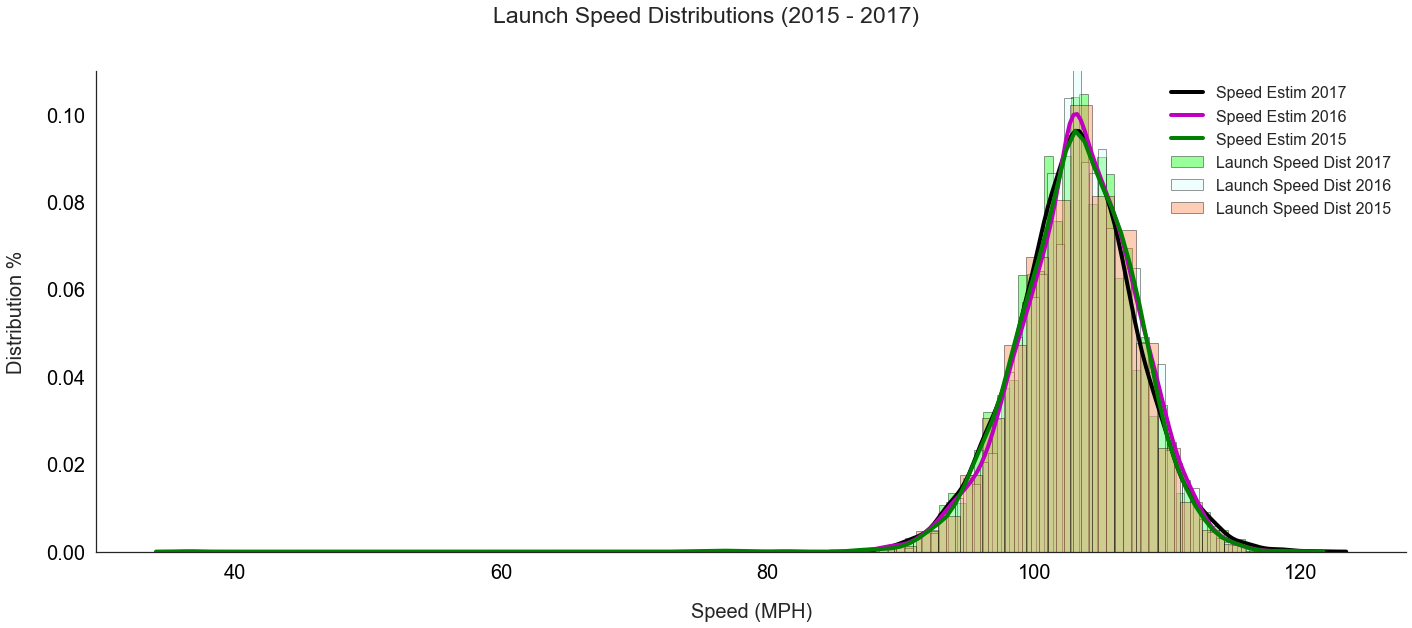

In [23]:
plt.figure(figsize=(20,9))
sns.set(style="white", font_scale=2)
sns.set_context("poster")

plt.suptitle('Launch Speed Distributions (2015 - 2017)')
a = sns.distplot(launch_speed17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"Speed Estim 2017","alpha":1},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 label='Launch Speed Dist 2017')
b = sns.distplot(launch_speed16, 
                 color = '#d6fffa', 
                 kde_kws={"color":"m","lw":4,"label":"Speed Estim 2016","alpha":1},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 label = 'Launch Speed Dist 2016')
c = sns.distplot(launch_speed15, 
                 color = '#fc824a', 
                 kde_kws={"color":"g","lw":4,"label":"Speed Estim 2015","alpha":1},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 label = 'Launch Speed Dist 2015')


plt.xlabel('Speed (MPH)', fontsize=20, labelpad=20)
plt.ylabel('Distribution %', fontsize=20, labelpad=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")
c.tick_params(labelsize=20,labelcolor="k")

sns.despine()

plt.tight_layout();
plt.subplots_adjust(top=0.88)

plt.savefig('../plots/dist_all_seasons.png')

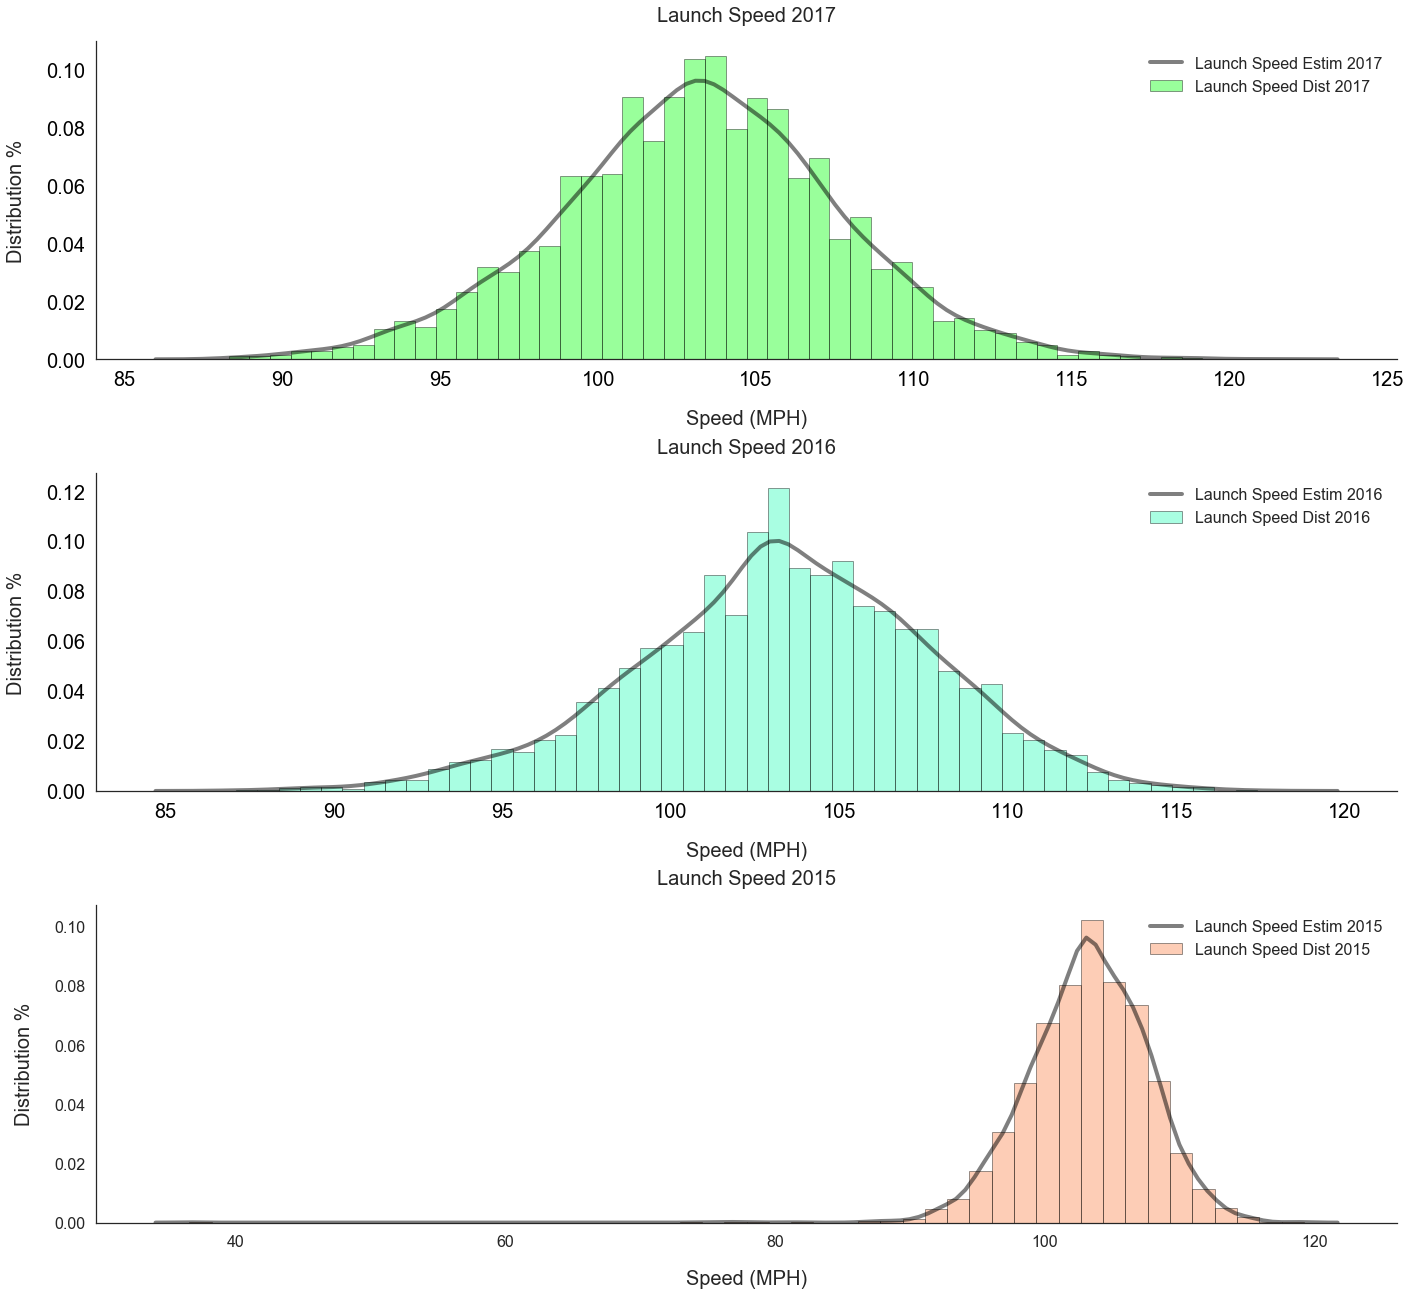

In [24]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(20,20))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.distplot(launch_speed17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim 2017","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[0],
                 label='Launch Speed Dist 2017')
b = sns.distplot(launch_speed16, 
                 color = '#2afeb7', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim 2016","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[1],
                 label = 'Launch Speed Dist 2016')
c = sns.distplot(launch_speed15, 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim 2015","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[2],
                 label = 'Launch Speed Dist 2015')

axes[0].set_xlabel('Speed (MPH)', fontsize=20, labelpad=20)
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('Launch Speed 2017', fontsize=20, pad=20)
axes[1].set_xlabel('Speed (MPH)', fontsize=20, labelpad=20)
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('Launch Speed 2016', fontsize=20, pad=20)
axes[2].set_xlabel('Speed (MPH)', fontsize=20, labelpad=20)
axes[2].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[2].set_title('Launch Speed 2015', fontsize=20, pad=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

fig.savefig('../plots/subplots_speed_by_year.png')

In [25]:
launch_angle17 = final_df[final_df['game_year'] == 2017][['launch_angle']]
launch_angle16 = final_df[final_df['game_year'] == 2016][['launch_angle']]
launch_angle15 = final_df[final_df['game_year'] == 2015][['launch_angle']]

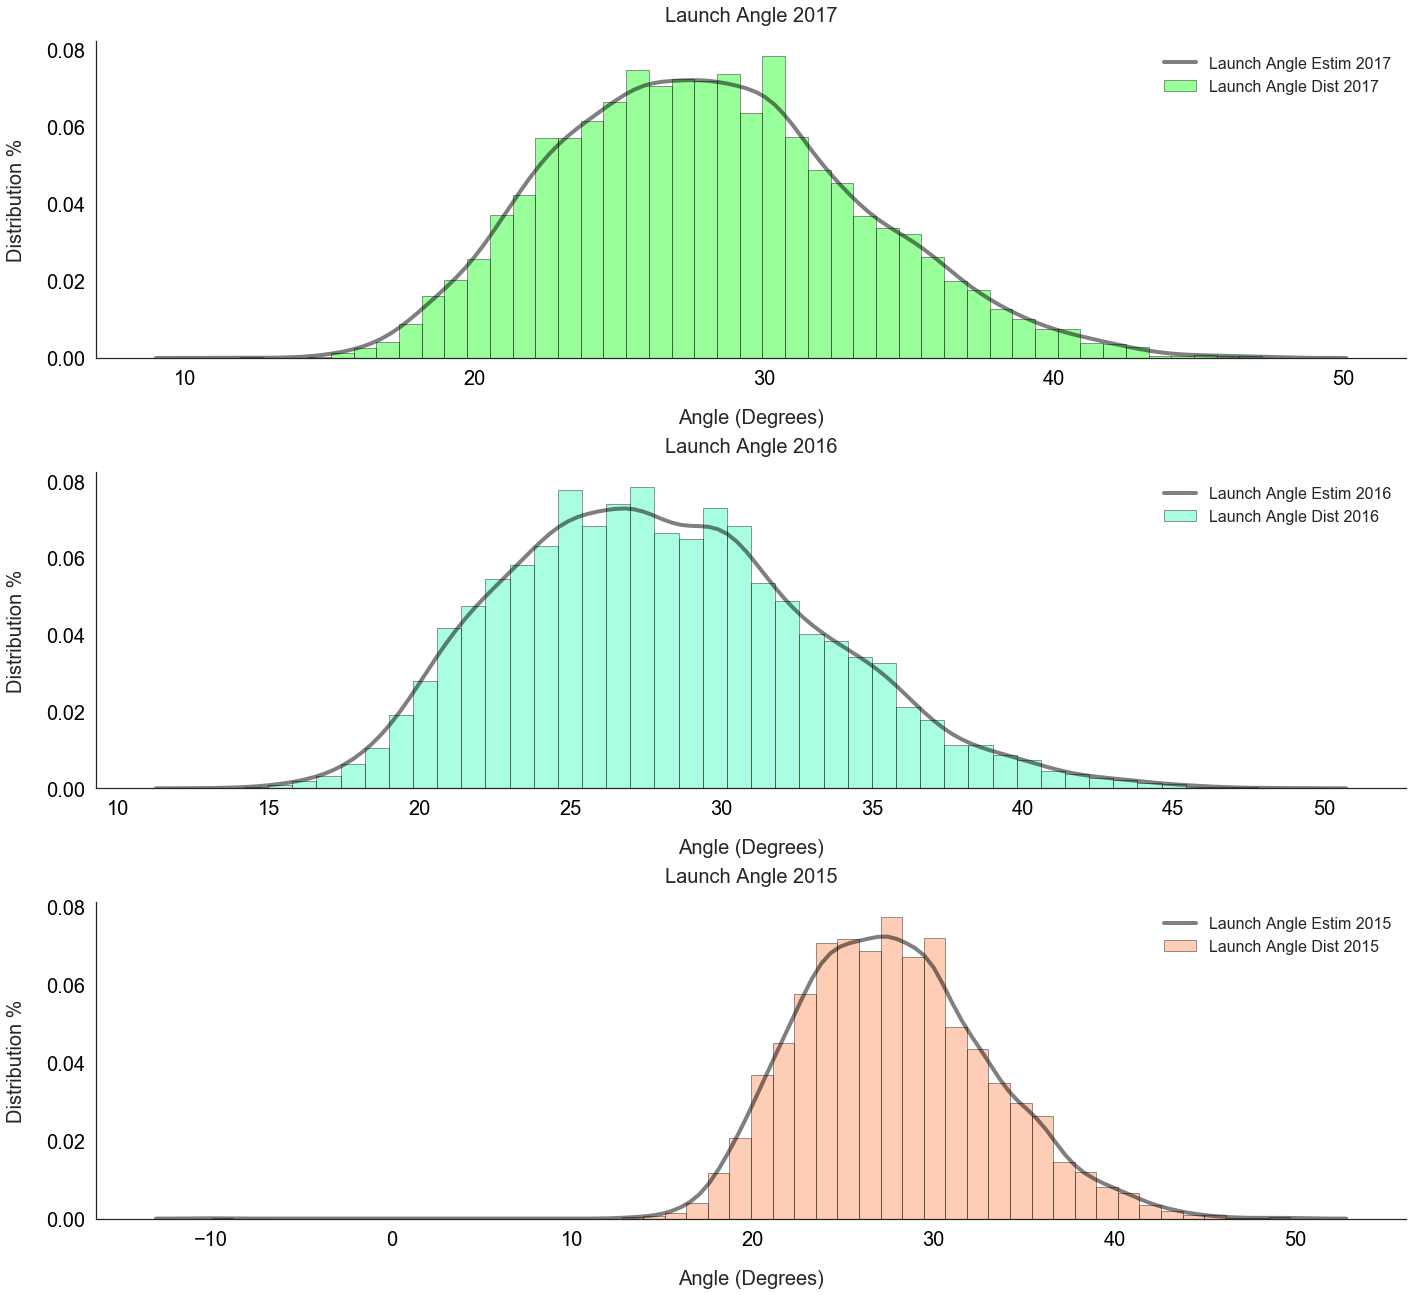

In [26]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(20,20))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.distplot(launch_angle17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim 2017","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[0],
                 label='Launch Angle Dist 2017')
b = sns.distplot(launch_angle16, 
                 color = '#2afeb7', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim 2016","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[1],
                 label = 'Launch Angle Dist 2016')
c = sns.distplot(launch_angle15, 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim 2015","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[2],
                 label = 'Launch Angle Dist 2015')

axes[0].set_xlabel('Angle (Degrees)', fontsize=20, labelpad=20)
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('Launch Angle 2017', fontsize=20, pad=20)
axes[1].set_xlabel('Angle (Degrees)', fontsize=20, labelpad=20)
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('Launch Angle 2016', fontsize=20, pad=20)
axes[2].set_xlabel('Angle (Degrees)', fontsize=20, labelpad=20)
axes[2].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[2].set_title('Launch Angle 2015', fontsize=20, pad=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")
c.tick_params(labelsize=20,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

fig.savefig('../plots/subplots_angle_by_year.png')

In [27]:
corr_df_launch_speed = final_df.corr()['launch_speed'].sort_values(ascending=False).to_frame()

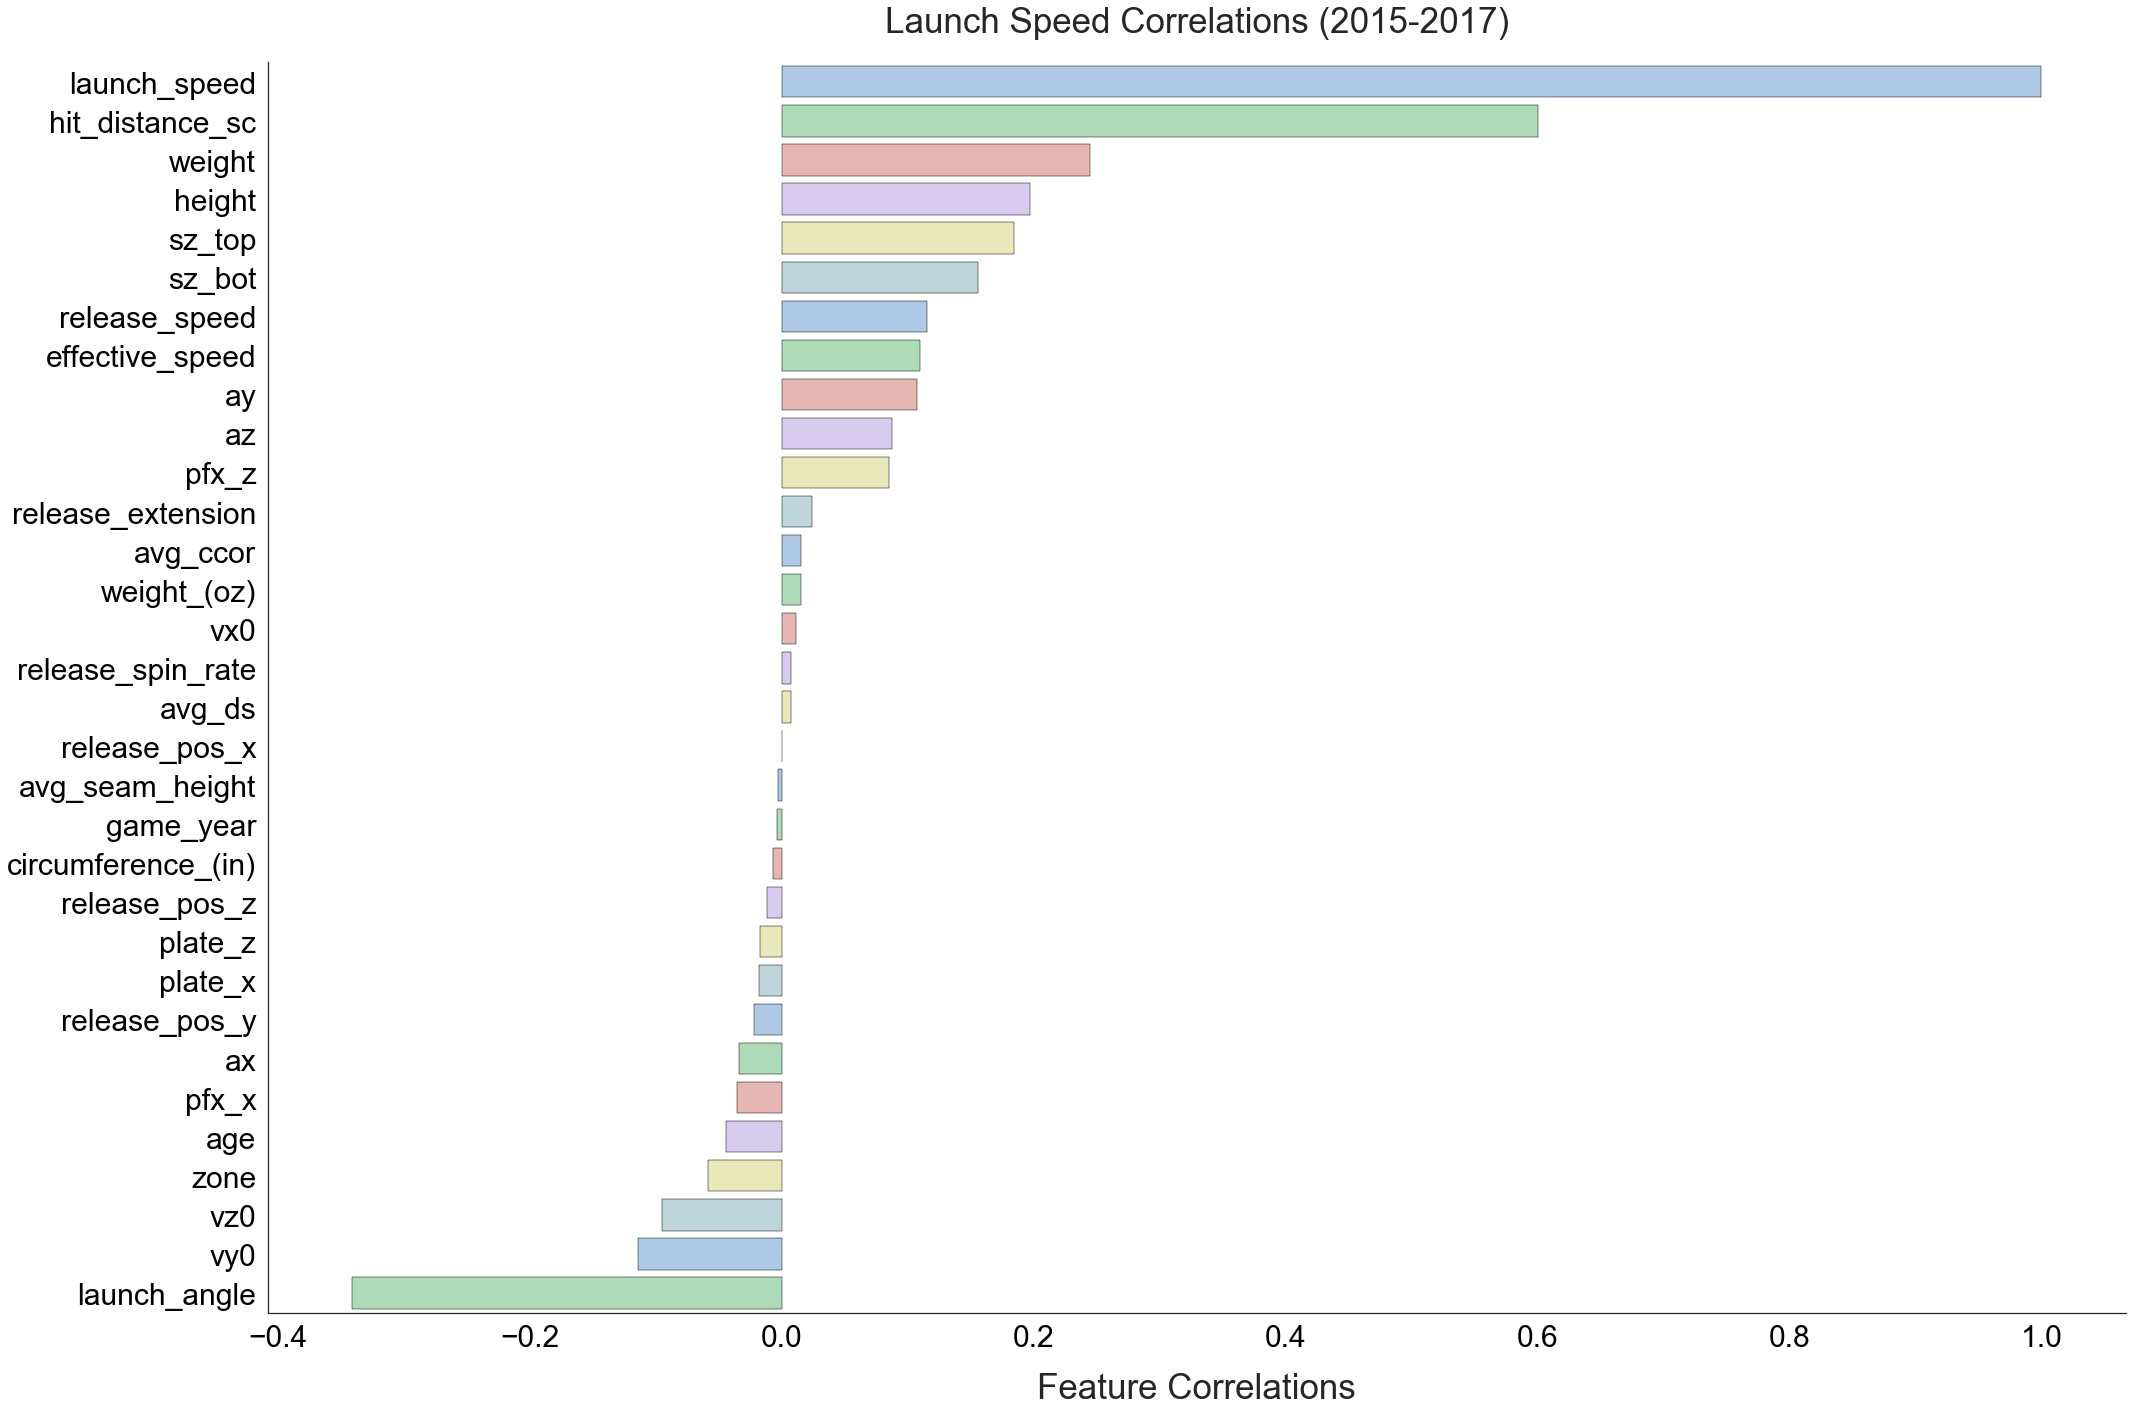

In [28]:
plt.figure(figsize=(30,20))

sns.set(style="white")
sns.set_context("poster")

plt.title('Launch Speed Correlations (2015-2017)', fontsize=35, pad=30)

a = sns.barplot(corr_df_launch_speed['launch_speed'],
                corr_df_launch_speed.index, 
                palette='pastel', saturation=.5, edgecolor='k')

plt.xlabel('Feature Correlations', fontsize=35, labelpad=20)

a.tick_params(labelsize=30, labelcolor="k")
sns.despine()

plt.tight_layout();

plt.savefig('../plots/launch_speed_correlations.png')

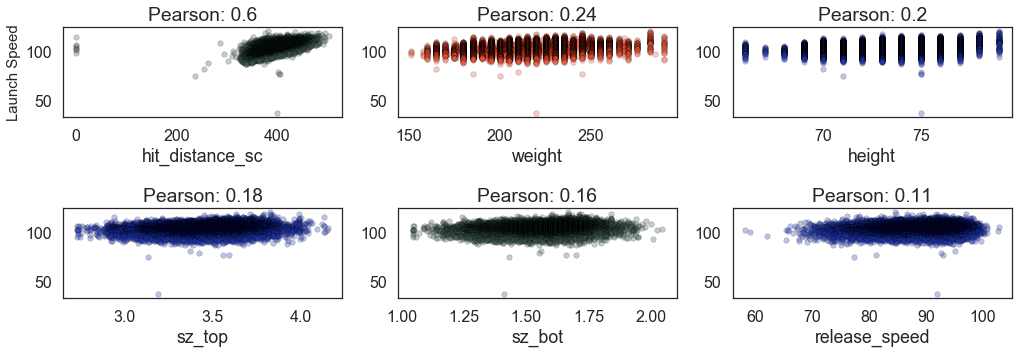

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17,5))
fig.subplots_adjust(hspace=1)

ax=ax.flatten()

cols = ['hit_distance_sc', 'weight', 'height','sz_top', 'sz_bot', 'release_speed']
colors=['#415952', '#f35134', '#243AB5', '#243AB5', '#415952', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Launch Speed', fontsize=15)
    i.scatter(final_df[cols[j]], final_df['launch_speed'],  alpha=0.3, color=colors[j], s=30, edgecolors='k')
    i.set_xlabel(cols[j])
    i.set_title(f'Pearson: {final_df.corr().loc[cols[j]]["launch_speed"].round(2)}')
    j+=1

In [30]:
final_df[final_df['launch_speed'] < 60]

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,zone,p_throws,bb_type,game_year,pfx_x,...,release_extension,release_pos_y,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds
21046,FF,91.9,-0.7695,6.4769,Bryce Harper,11.0,R,line_drive,2015,-0.795217,...,6.982,53.5191,75,220,25,5.120125,9.107917,0.040502,0.491333,12740.875


In [31]:
final_df2 = final_df.reset_index()

In [32]:
final_df2[final_df2['launch_speed'] < 60]

,index,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,zone,p_throws,bb_type,game_year,...,release_extension,release_pos_y,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds
16387,21046,FF,91.9,-0.7695,6.4769,Bryce Harper,11.0,R,line_drive,2015,...,6.982,53.5191,75,220,25,5.120125,9.107917,0.040502,0.491333,12740.875


In [33]:
final_df2.drop(final_df2.index[16387], inplace=True)

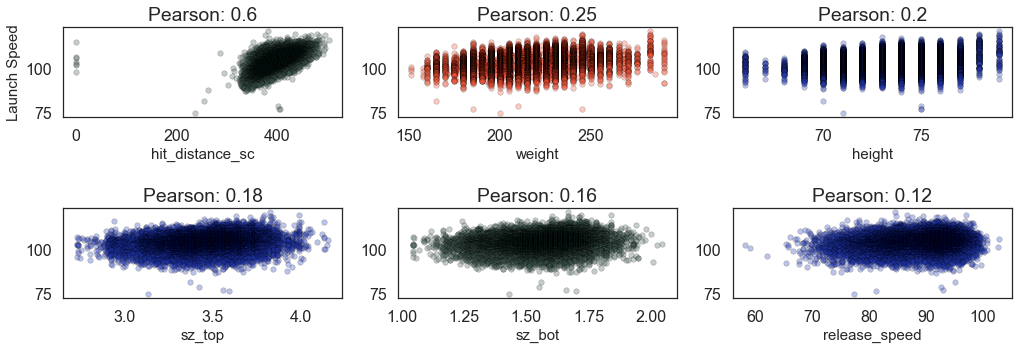

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))
fig.subplots_adjust(hspace=1)

ax=ax.flatten()

cols = ['hit_distance_sc', 'weight', 'height','sz_top', 'sz_bot', 'release_speed']
colors=['#415952', '#f35134', '#243AB5', '#243AB5', '#415952', '#243AB5', '#243AB5']

j=0
for i in ax:
    #print(i)
    if j==0:
        i.set_ylabel('Launch Speed', fontsize=15)
    i.scatter(final_df2[cols[j]], final_df2['launch_speed'],  alpha=0.3, s=30, color=colors[j], edgecolors='k')
    i.set_xlabel(cols[j], fontsize=15)
    i.set_title('Pearson: %s'%final_df2.corr().loc[cols[j]]['launch_speed'].round(2))
    j+=1

In [35]:
mask = final_df2[final_df2['hit_distance_sc'] < 200]
mask.index.values

array([   67,  4326,  5007,  7937,  9583, 10797, 14510])

In [36]:
final_df3 = final_df2.drop(mask.index.values)

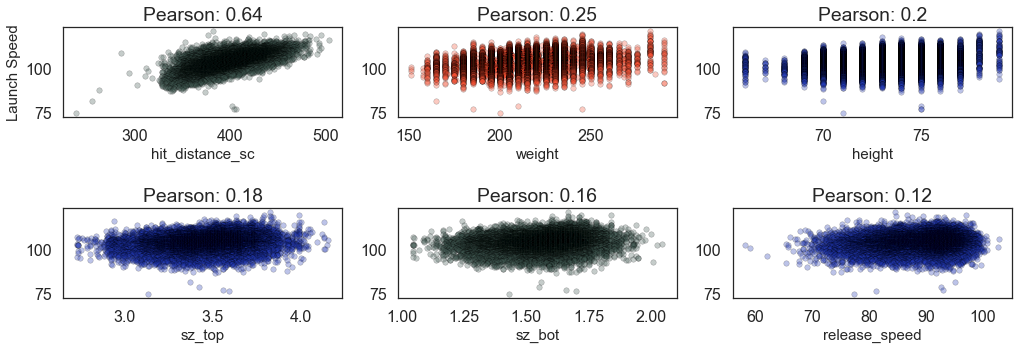

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17,5))
fig.subplots_adjust(hspace=1)

ax=ax.flatten()

cols = ['hit_distance_sc', 'weight', 'height','sz_top', 'sz_bot', 'release_speed']
colors=['#415952', '#f35134', '#243AB5', '#243AB5', '#415952', '#243AB5', '#243AB5']

j=0
for i in ax:
    if j==0:
        i.set_ylabel('Launch Speed', fontsize=15)
    i.scatter(final_df3[cols[j]], final_df3['launch_speed'], s=30, alpha=0.3, color=colors[j], edgecolors='k')
    i.set_xlabel(cols[j], fontsize=15)
    i.set_title('Pearson: %s'%final_df3.corr().loc[cols[j]]['launch_speed'].round(2))
    j+=1

#### Drop Hit Distance Home Run Outliers

Dropping the Hit Distance Home Runs that are equal to zero

In [38]:
final_df[final_df['hit_distance_sc'] == 0]

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,zone,p_throws,bb_type,game_year,pfx_x,...,release_extension,release_pos_y,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds
67,SL,89.0,-0.6549,6.0643,Hanley Ramirez,9.0,R,line_drive,2016,0.363200,...,6.074,54.4262,74,235,34,5.122500,9.079,0.038432,0.494100,12926.4
5108,SL,87.9,-2.4077,6.2765,Cody Bellinger,4.0,R,fly_ball,2017,-0.502900,...,5.978,54.5221,76,210,23,5.104863,9.080,0.038000,0.476463,12926.0
5998,CH,86.4,0.8119,5.7367,Evan Longoria,7.0,L,line_drive,2016,1.256100,...,6.310,54.1901,73,215,32,5.122500,9.079,0.038432,0.494100,12926.4
9827,FF,92.1,2.8788,5.5237,Jose Peraza,1.0,L,fly_ball,2017,0.325900,...,6.838,53.6625,72,196,24,5.104863,9.080,0.038000,0.476463,12926.0
11999,CU,83.5,-1.0145,5.7647,Stephen Piscotty,7.0,R,fly_ball,2016,0.160858,...,6.450,54.0517,75,210,27,5.122500,9.079,0.038432,0.494100,12926.4
13632,SL,85.7,3.5189,6.6063,Aaron Hill,7.0,L,fly_ball,2016,0.151117,...,4.533,55.9658,71,200,36,5.122500,9.079,0.038432,0.494100,12926.4
18568,FT,92.3,-0.9786,7.1346,Aaron Hicks,11.0,R,fly_ball,2017,-1.012900,...,5.988,54.5100,73,202,29,5.104863,9.080,0.038000,0.476463,12926.0


In [39]:
final_df.reset_index(inplace=True)

In [40]:
final_df.head()

,index,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,zone,p_throws,bb_type,game_year,...,release_extension,release_pos_y,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds
0,0,CH,84.5,-3.4020,6.4696,Aaron Judge,4.0,R,line_drive,2017,...,6.342,54.1561,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000
1,1,FF,97.1,-2.8091,5.9279,Aaron Judge,5.0,R,line_drive,2017,...,6.043,54.4549,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000
2,2,CU,86.7,-1.5647,5.3406,Giancarlo Stanton,7.0,R,line_drive,2015,...,5.035,55.4629,78,245,28,5.120125,9.107917,0.040502,0.491333,12740.875
3,3,SL,89.5,2.0682,6.1177,Giancarlo Stanton,8.0,L,fly_ball,2017,...,5.433,55.0652,78,245,28,5.104863,9.080000,0.038000,0.476463,12926.000
4,4,SL,84.7,-1.9795,5.6860,Aaron Judge,5.0,R,fly_ball,2017,...,6.153,54.3442,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000


In [41]:
mask = final_df[final_df['hit_distance_sc'] == 0]
mask.index.values

array([   67,  4326,  5007,  7937,  9583, 10797, 14510])

In [42]:
final_df = final_df.drop(mask.index.values)

In [43]:
final_df.drop('index', axis=1, inplace=True)

#### Save the Data

In [44]:
final_df.to_csv('../data/final_for_preprocessing.csv')

In [45]:
pitch_launch_speed = final_df.groupby(['pitch_type', 'game_year']).mean()[['launch_speed']]
pitch_launch_speed.reset_index(inplace=True)

In [46]:
pitch_17 = pitch_launch_speed[pitch_launch_speed['game_year'] == 2017].sort_values('pitch_type', ascending=False)
pitch_16 = pitch_launch_speed[pitch_launch_speed['game_year'] == 2016].sort_values('pitch_type', ascending=False)
pitch_15 = pitch_launch_speed[pitch_launch_speed['game_year'] == 2015].sort_values('pitch_type', ascending=False)

In [47]:
pitch_17.head()

,pitch_type,game_year,launch_speed
35,SL,2017,102.578353
32,SI,2017,103.537093
29,SC,2017,107.200000
28,KN,2017,101.942105
25,KC,2017,102.437363


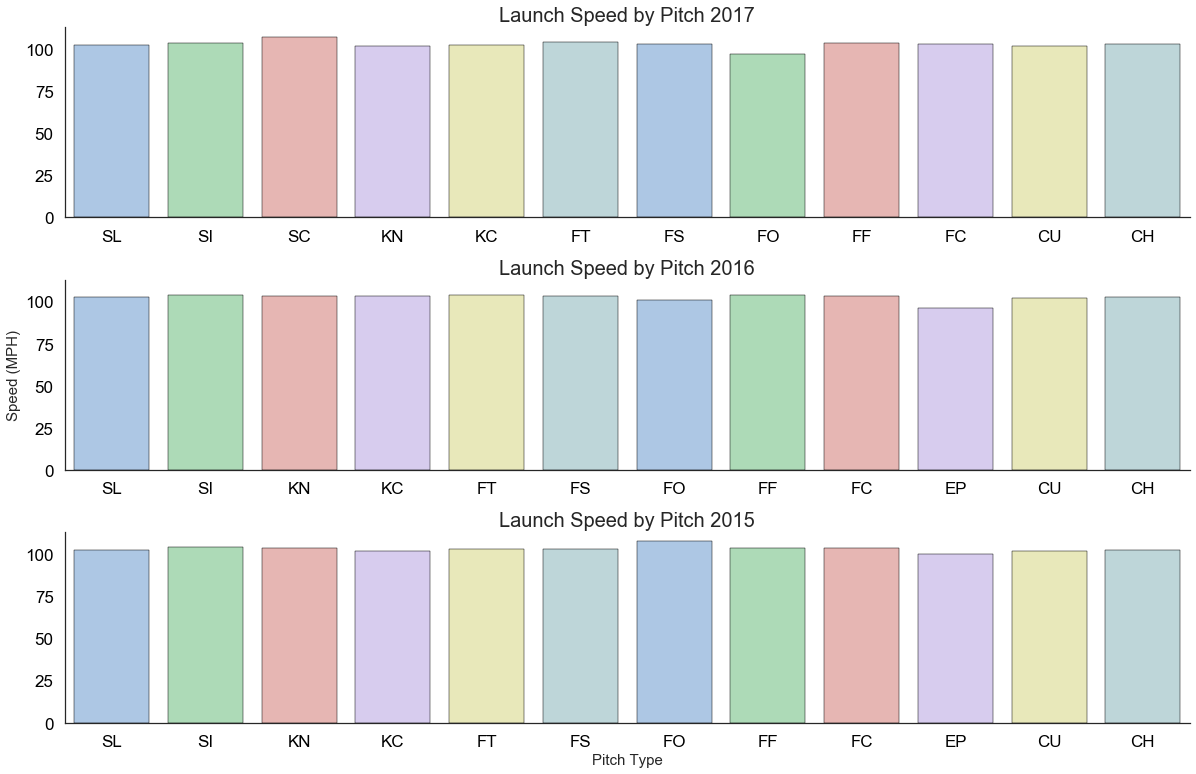

In [48]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharey=True, figsize=(17,12))

sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.barplot(pitch_17['pitch_type'], 
                pitch_17['launch_speed'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[0],
                label='Launch Speeds 2017')

b = sns.barplot(pitch_16['pitch_type'], 
                pitch_16['launch_speed'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[1],
                label='Launch Speeds 2016')

c = sns.barplot(pitch_15['pitch_type'], 
                pitch_15['launch_speed'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[2],
                label='Launch Speeds 2015')

axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_title('Launch Speed by Pitch 2017', fontsize=20)
axes[1].set_ylabel('Speed (MPH)', fontsize=15)
axes[1].set_xlabel('')
axes[1].set_title('Launch Speed by Pitch 2016', fontsize=20)
axes[2].set_ylabel('')
axes[2].set_xlabel('Pitch Type', fontsize=15)
axes[2].set_title('Launch Speed by Pitch 2015', fontsize=20)

a.tick_params(labelsize=17,labelcolor="k")
b.tick_params(labelsize=17,labelcolor="k")
c.tick_params(labelsize=17,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

In [64]:
final_df.head()

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,zone,p_throws,bb_type,game_year,pfx_x,...,release_extension,release_pos_y,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds
0,CH,84.5,-3.4020,6.4696,Aaron Judge,4.0,R,line_drive,2017,-0.900200,...,6.342,54.1561,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000
1,FF,97.1,-2.8091,5.9279,Aaron Judge,5.0,R,line_drive,2017,-1.194800,...,6.043,54.4549,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000
2,CU,86.7,-1.5647,5.3406,Giancarlo Stanton,7.0,R,line_drive,2015,0.670208,...,5.035,55.4629,78,245,28,5.120125,9.107917,0.040502,0.491333,12740.875
3,SL,89.5,2.0682,6.1177,Giancarlo Stanton,8.0,L,fly_ball,2017,-0.130300,...,5.433,55.0652,78,245,28,5.104863,9.080000,0.038000,0.476463,12926.000
4,SL,84.7,-1.9795,5.6860,Aaron Judge,5.0,R,fly_ball,2017,-0.456100,...,6.153,54.3442,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000


In [49]:
bb_type_year = final_df.groupby(['game_year', 'bb_type']).count()['pitch_type'].to_frame().reset_index()
bb_type_year

,game_year,bb_type,pitch_type
0,2015,fly_ball,2691
1,2015,line_drive,2123
2,2016,fly_ball,3690
3,2016,line_drive,1847
4,2017,fly_ball,5007
5,2017,line_drive,1023


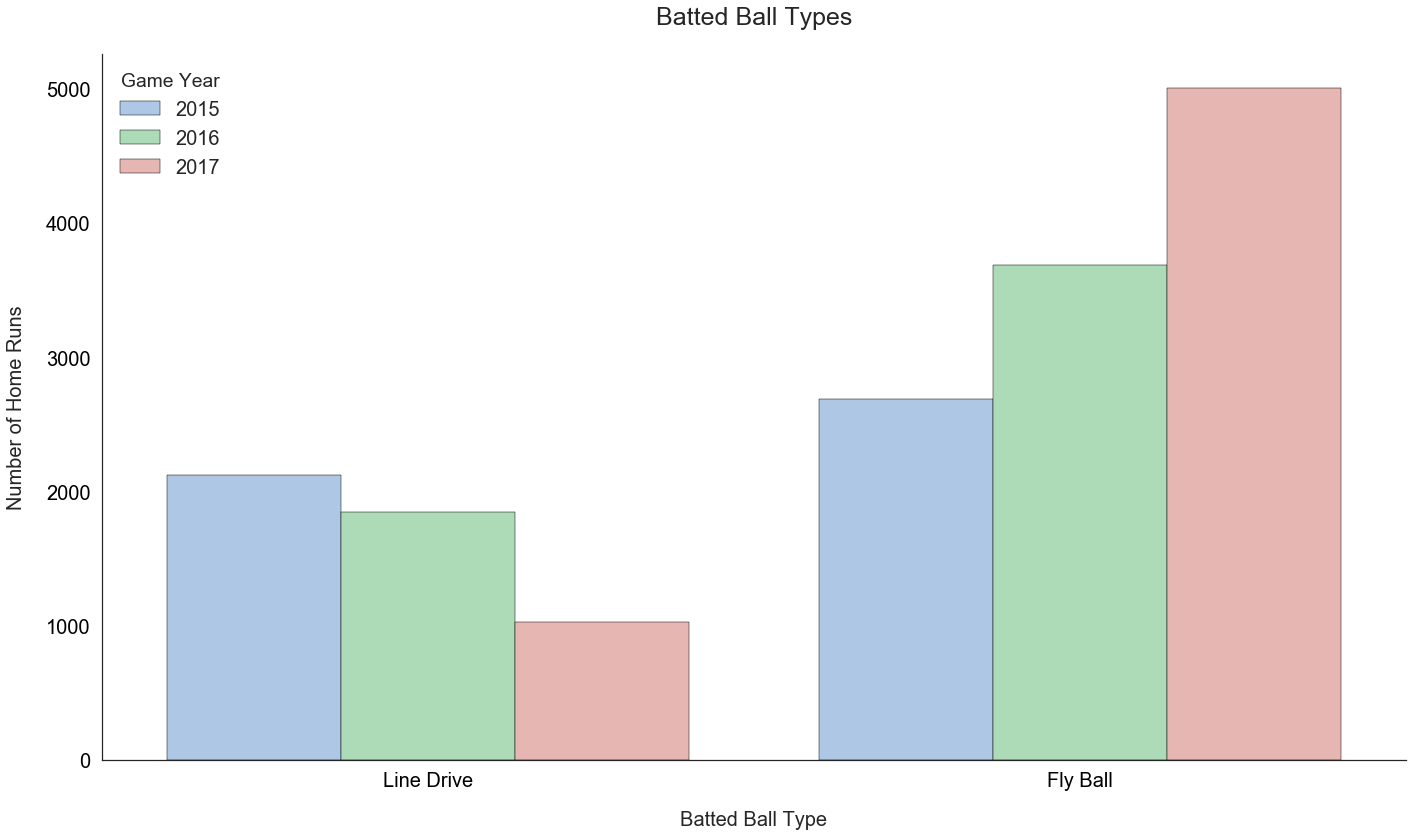

In [50]:
plt.figure(figsize=(20,12))

sns.set(style="white")
sns.set_context("poster")

plt.title('Batted Ball Types', fontsize=25, pad=30)

a = sns.barplot(bb_type_year['bb_type'].replace({'line_drive':'Line Drive', 'fly_ball':'Fly Ball'}), 
                bb_type_year['pitch_type'], 
                hue=bb_type_year['game_year'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                order=['Line Drive', 'Fly Ball']
               )

plt.xlabel('Batted Ball Type', fontsize=20, labelpad=20)
plt.ylabel('Number of Home Runs', fontsize=20, labelpad=20)
plt.legend(title="Game Year", fontsize=20)


a.tick_params(labelsize=20, labelcolor="k")

sns.despine()

plt.tight_layout();

In [68]:
final_df.groupby(['game_year','bb_type']).mean()[['launch_speed']]

launch_speed
game_year bb_type                 
2015      fly_ball      102.492754
          line_drive    104.068111
2016      fly_ball      102.823388
          line_drive    104.424256
2017      fly_ball      102.843439
          line_drive    104.691691

In [74]:
final_df.groupby(['age']).count()[['pitch_type']]

,pitch_type
age,
21,15
22,12
23,104
24,579
25,716
26,1207
27,1620
28,1438
29,1145


In [51]:
pitch_type_counts = final_df['pitch_type'].value_counts().to_frame()
pitch_type_counts.reset_index(inplace=True)

In [52]:
pitch_type_counts

,index,pitch_type
0,FF,6507
1,SL,2363
2,FT,2118
3,CH,1809
4,SI,1156
5,CU,1012
6,FC,859
7,FS,268
8,KC,208
9,KN,70


In [53]:
pitch_type_counts.columns = ['pitch_type', 'pitch_counts']
pitch_type_counts.set_index('pitch_type', inplace=True)

In [54]:
pitch_type_counts

,pitch_counts
pitch_type,
FF,6507
SL,2363
FT,2118
CH,1809
SI,1156
CU,1012
FC,859
FS,268
KC,208


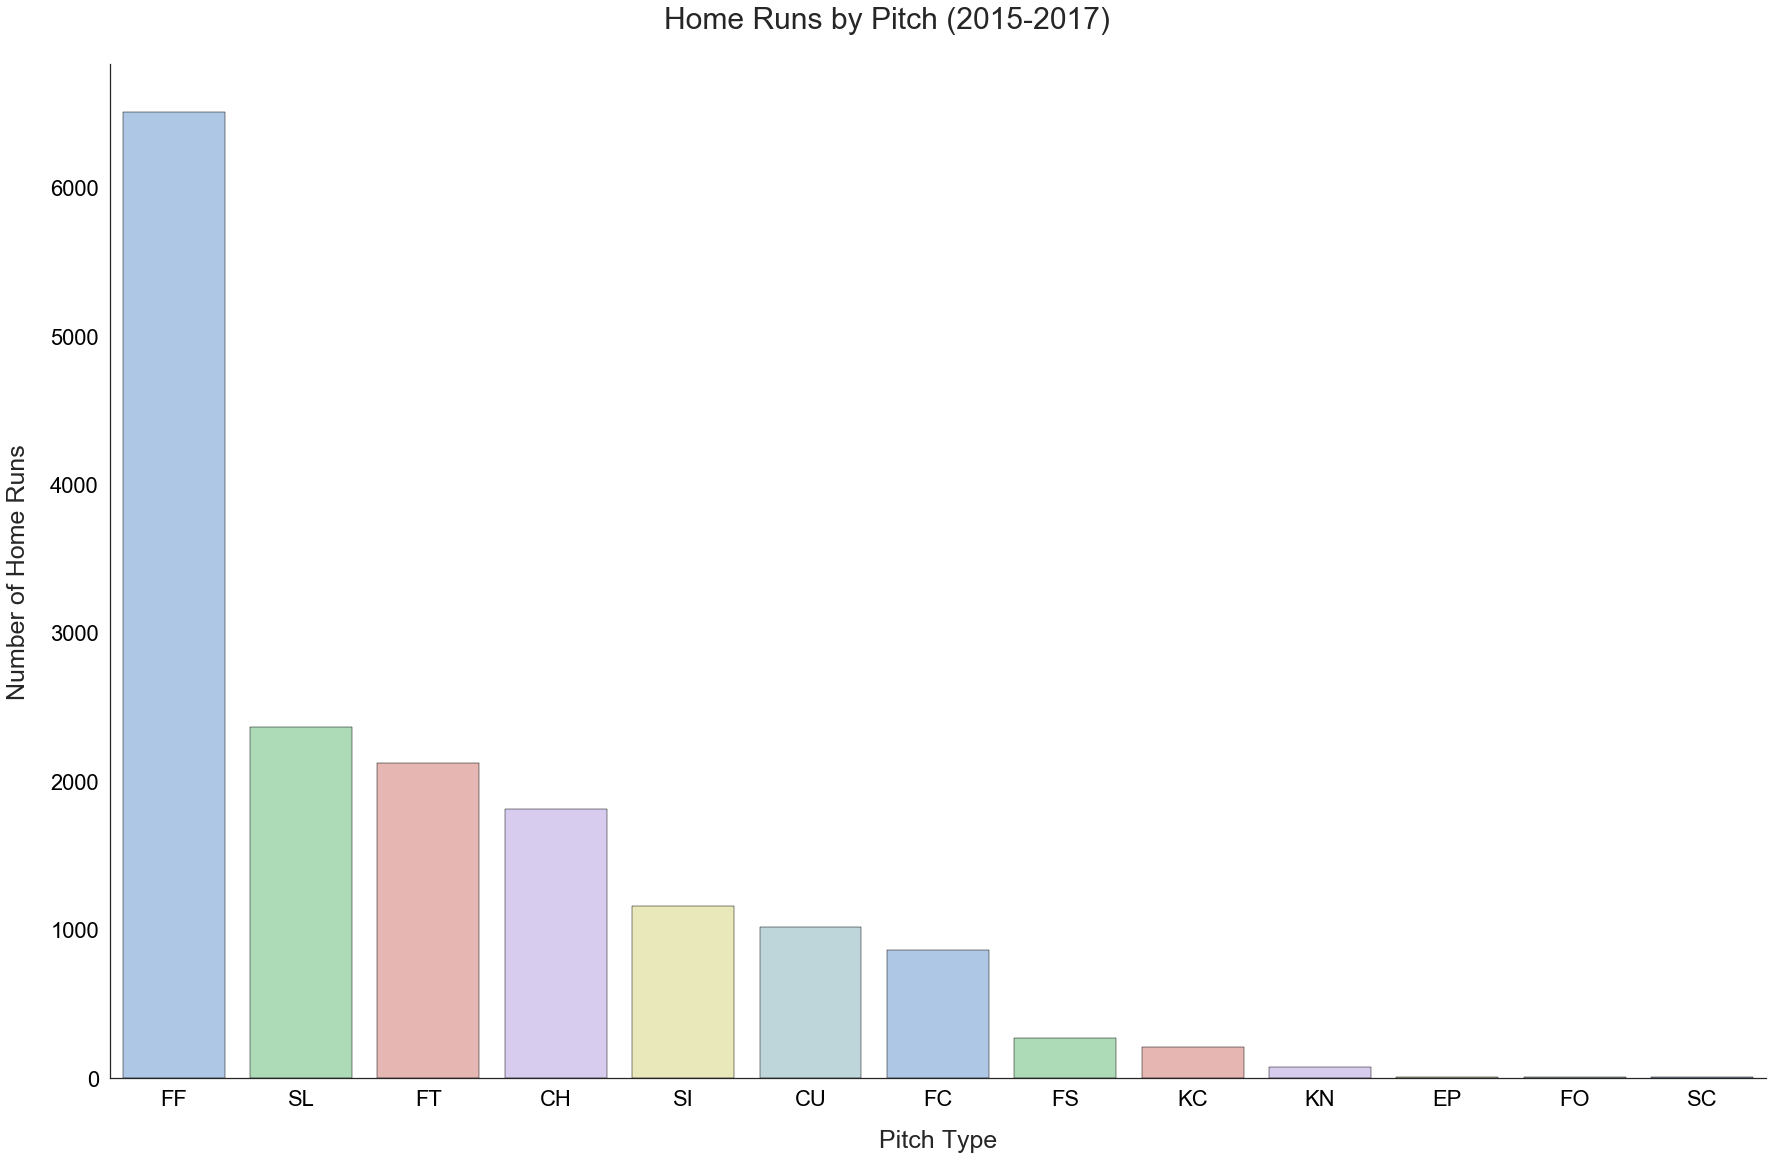

In [75]:
plt.figure(figsize=(25,8))

sns.set(style="white")
sns.set_context("poster")

plt.suptitle('Home Runs by Pitch (2015-2017)', fontsize=30)

a = sns.barplot(pitch_type_counts.index,
                pitch_type_counts['pitch_counts'], 
                palette='pastel', saturation=.5, edgecolor='k')

plt.xlabel('Pitch Type', fontsize=25, labelpad=20)
plt.ylabel('Number of Home Runs', fontsize = 25, labelpad=20)

a.tick_params(labelsize=22,labelcolor="k")
sns.despine()

plt.tight_layout();
plt.subplots_adjust(top=0.88, bottom=-0.88)

#plt.savefig('../plots/launch_speed_correlations.png')

In [56]:
pitch_type_counts17 = final_df[final_df['game_year'] == 2017][['pitch_type']]
pitch_type_counts17 = pitch_type_counts17['pitch_type'].value_counts().to_frame()

In [57]:
pitch_type_counts16 = final_df[final_df['game_year'] == 2016][['pitch_type']]
pitch_type_counts16 = pitch_type_counts16['pitch_type'].value_counts().to_frame()

In [58]:
pitch_type_counts15 = final_df[final_df['game_year'] == 2015][['pitch_type']]
pitch_type_counts15 = pitch_type_counts15['pitch_type'].value_counts().to_frame()

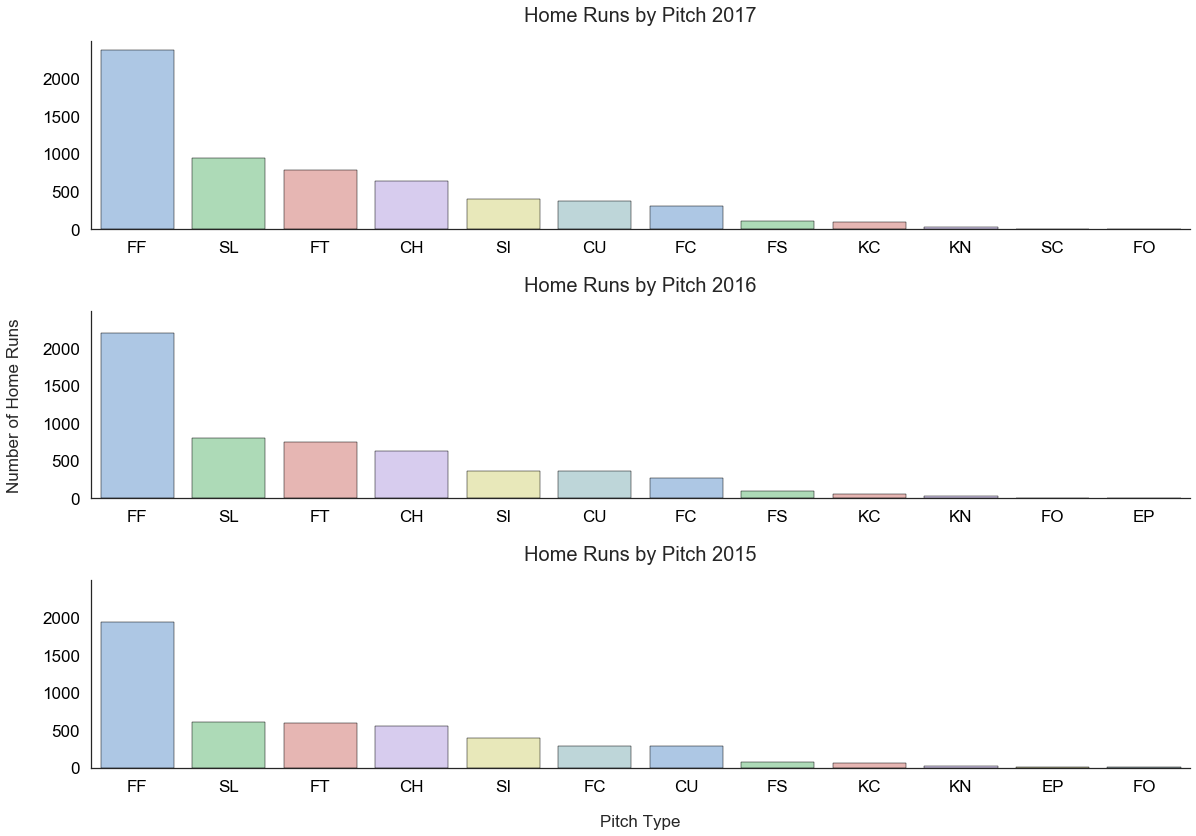

In [59]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharey=True, figsize=(17,12))

sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.barplot(pitch_type_counts17.index, 
                pitch_type_counts17['pitch_type'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[0],
                label='Launch Speeds 2017')

b = sns.barplot(pitch_type_counts16.index, 
                pitch_type_counts16['pitch_type'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[1],
                label='Launch Speeds 2016')

c = sns.barplot(pitch_type_counts15.index, 
                pitch_type_counts15['pitch_type'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[2],
                label='Launch Speeds 2015')

axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_title('Home Runs by Pitch 2017', fontsize=20, pad=20)
axes[1].set_ylabel('Number of Home Runs', fontsize=17, labelpad=20)
axes[1].set_xlabel('')
axes[1].set_title('Home Runs by Pitch 2016', fontsize=20, pad=20)
axes[2].set_ylabel('')
axes[2].set_xlabel('Pitch Type', fontsize=17, labelpad=20)
axes[2].set_title('Home Runs by Pitch 2015', fontsize=20, pad=20)

a.tick_params(labelsize=17,labelcolor="k")
b.tick_params(labelsize=17,labelcolor="k")
c.tick_params(labelsize=17,labelcolor="k")

fig.tight_layout();


In [60]:
zone_counts = final_df['zone'].value_counts().to_frame()
zone_counts.reset_index(inplace=True)

In [61]:
zone_counts.columns = ['zones', 'zone_counts']

In [62]:
zone_counts.set_index('zones', inplace=True)

In [63]:
zone_counts

,zone_counts
zones,
5.0,3700
4.0,2350
8.0,1980
6.0,1697
2.0,1516
7.0,1223
9.0,871
1.0,856
3.0,726


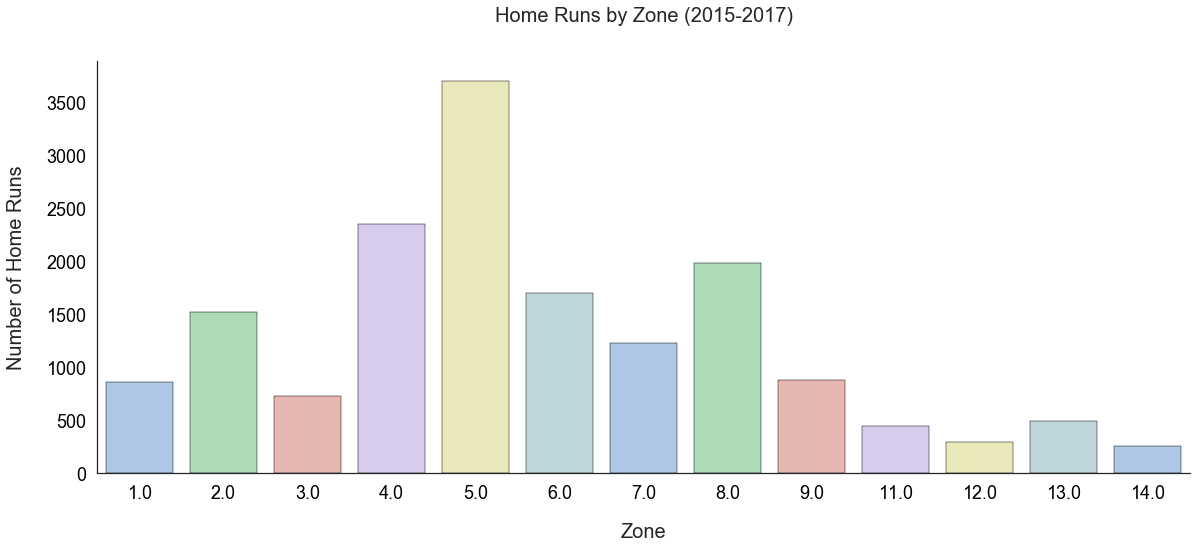

In [170]:
plt.figure(figsize=(17,8))

sns.set(style="white")
sns.set_context("poster")

plt.title('Home Runs by Zone (2015-2017)', fontsize=20, pad=40)

a = sns.barplot(zone_counts.index,
                zone_counts['zone_counts'], 
                palette='pastel', saturation=.5, edgecolor='k')

plt.xlabel('Zone', fontsize=20, labelpad=20)
plt.ylabel('Number of Home Runs', fontsize = 20, labelpad=20)

a.tick_params(labelsize=18,labelcolor="k")
sns.despine()

plt.tight_layout();

#plt.savefig('../plots/launch_speed_correlations.png')

In [ ]:
final_df

- Age Launch Speed
- Height Launch Speed
- Weight Launch Speed
- Age number of HR

- Baseballs:
    - Launch Speed
    - Launch Angle

In [128]:
pitch_type             Done
release_speed          Done
release_pos_x         float64
release_pos_z         float64
player_name            TO DO
zone                   TO DO
p_throws               TO DO
bb_type                TO DO
game_year               DONE
pfx_x                  TO DO
pfx_z                  TO DO
plate_x                TO DO
plate_z               TO DO
vx0                   TO DO
vy0                   TO DO
vz0                   TO DO
ax                    TO DO
ay                    TO DO
az                    TO DO
sz_top                Done
sz_bot                Done
hit_distance_sc       Done
launch_speed          ALL
launch_angle          TO DO
effective_speed       TO DO
release_spin_rate     TO DO
release_extension     TO DO
release_pos_y         TO DO
height                  TO DO
weight                  TO DO
age                     TO DO
weight_(oz)           TO DO
circumference_(in)    TO DO
avg_seam_height       TO DO
avg_ccor              TO DO
avg_ds                TO DO

SyntaxError: invalid syntax (<ipython-input-128-4ce20a1001b7>, line 1)

In [ ]:
Scatter plot of launch angles vs launch speeds:
    -2017
    -2016
    -2015

In [ ]:
g = sns.PairGrid(sub_col_df)
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()